# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

### Get Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [3]:
bbc.sample(5)

,category,text
1992,tech,us peer-to-peer pirates convicted the first co...
364,entertainment,bangkok film festival battles on organisers of...
1007,politics,child access law shake-up planned parents who ...
693,sport,lewis-francis turns to christie mark lewis-fra...
780,sport,london irish 19-33 wasps wasps made light of t...


In [4]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


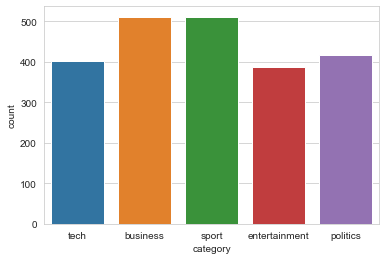

In [5]:
# Your code here
sns.countplot(bbc.category)

In [6]:
# stop words
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Lemmatization
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
  
def tokenizer_lemmatizer(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]

In [8]:
bbc['code'] = bbc.category.astype('category').cat.codes
bbc.code.unique()

array([4, 0, 3, 1, 2], dtype=int8)

In [41]:
X = bbc.text
y = bbc.code

In [42]:
y.unique()

array([4, 0, 3, 1, 2], dtype=int8)

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [44]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1780,) (1780,) (445,) (445,)


In [45]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer(stop_words = stop_words, tokenizer=tokenizer_lemmatizer)

In [47]:
X_train

1947    aviation firms eye booming india india s defen...
1806    clarke to unveil immigration plan new controls...
1756    laura ashley chief stepping down laura ashley ...
2195    owen delighted with real display michael owen ...
1431    chelsea ridiculed over complaint barcelona ass...
                              ...                        
1447    trial begins of spain s top banker the trial o...
390     joy division story to become film the life of ...
1724    players sought for $1m prize uk gamers are get...
903     telewest to challenge sky plus cable firm tele...
1430    dundee utd 4-1 aberdeen dundee united eased in...
Name: text, Length: 1780, dtype: object

In [50]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [51]:
X_train

<1780x36789 sparse matrix of type '<class 'numpy.float64'>'
	with 292158 stored elements in Compressed Sparse Row format>

In [52]:
model = LogisticRegression(random_state = 0, C = 0.1, solver = 'sag')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=0, solver='sag')

In [53]:
# Using Test dataset to evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
y_pred_train = model.predict(X_train)
print('Train accuracy:',accuracy_score(y_train,y_pred_train))
y_pred_test = model.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,y_pred_test))

# classification_report
print('classification report:\n',classification_report(y_test,y_pred_test))
# confusion matrix
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

Train accuracy: 0.9544943820224719
Test accuracy: 0.9393258426966292
classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       104
           1       0.98      0.88      0.93        68
           2       1.00      0.88      0.94        86
           3       0.93      1.00      0.96       101
           4       1.00      0.91      0.95        86

    accuracy                           0.94       445
   macro avg       0.95      0.93      0.94       445
weighted avg       0.95      0.94      0.94       445

confusion matrix:
 [[103   0   0   1   0]
 [  5  60   0   3   0]
 [  7   0  76   3   0]
 [  0   0   0 101   0]
 [  6   1   0   1  78]]


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

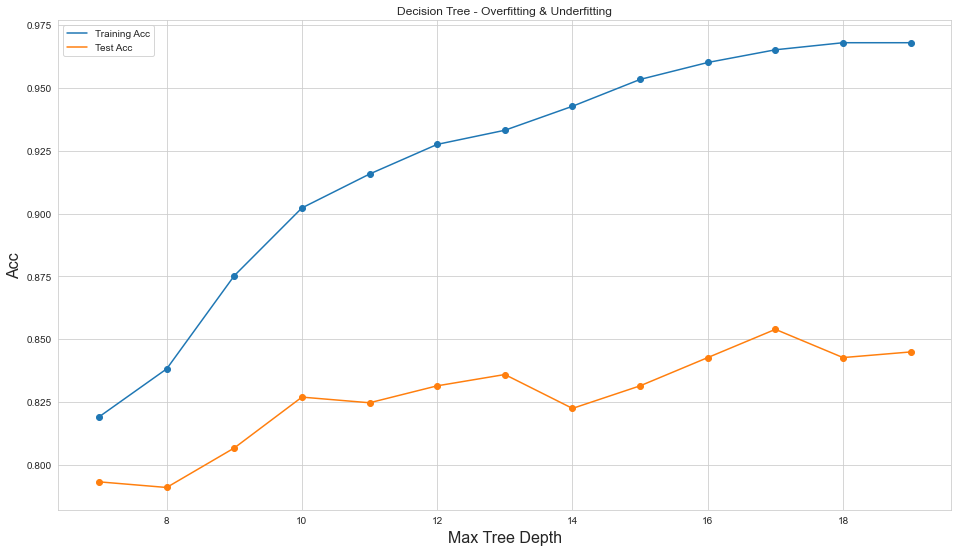

In [61]:
max_depths = np.arange(7, 20)
train_errors = []
test_errors = []
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state= 10, min_samples_split = 5).fit(X_train, y_train)
    train_errors.append(accuracy_score(y_train, model.predict(X_train)))
    test_errors.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(16, 9))
plt.scatter(max_depths, train_errors)
plt.plot(max_depths, train_errors, label='Training Acc')
plt.scatter(max_depths, test_errors)
plt.plot(max_depths, test_errors, label='Test Acc')
plt.legend()
plt.title('Decision Tree - Overfitting & Underfitting')
plt.xlabel('Max Tree Depth', fontsize=16)
plt.ylabel('Acc', fontsize=16)
plt.show()

Choose mã+depth = 17 and use RandomForest

In [62]:
model = RandomForestClassifier(max_depth = 17)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=17)

In [64]:
y_pred_train = model.predict(X_train)
print('Train accuracy:',accuracy_score(y_train,y_pred_train))
y_pred_test = model.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,y_pred_test))

# classification_report
print('classification report:\n',classification_report(y_test,y_pred_test))
# confusion matrix
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

Train accuracy: 0.998876404494382
Test accuracy: 0.9730337078651685
classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       104
           1       1.00      0.96      0.98        68
           2       0.99      0.98      0.98        86
           3       0.98      1.00      0.99       101
           4       0.99      0.94      0.96        86

    accuracy                           0.97       445
   macro avg       0.98      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

confusion matrix:
 [[102   0   1   0   1]
 [  2  65   0   1   0]
 [  1   0  84   1   0]
 [  0   0   0 101   0]
 [  5   0   0   0  81]]


In [69]:
X = tfidf.transform(X)

In [70]:
y_pred = model.predict(X)

# classification_report
print('classification report:\n',classification_report(y,y_pred))
# confusion matrix
print('confusion matrix:\n',confusion_matrix(y,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       510
           1       1.00      0.99      1.00       386
           2       1.00      0.99      0.99       417
           3       0.99      1.00      1.00       511
           4       1.00      0.99      0.99       401

    accuracy                           0.99      2225
   macro avg       0.99      0.99      0.99      2225
weighted avg       0.99      0.99      0.99      2225

confusion matrix:
 [[508   0   1   0   1]
 [  2 383   0   1   0]
 [  2   0 413   2   0]
 [  0   0   0 511   0]
 [  5   0   0   0 396]]


In [65]:
from sklearn import svm

In [71]:
model = svm.SVC(C = 10)
model.fit(X_train, y_train)

SVC(C=10)

In [72]:
y_pred_train = model.predict(X_train)
print('Train accuracy:',accuracy_score(y_train,y_pred_train))
y_pred_test = model.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,y_pred_test))

# classification_report
print('classification report:\n',classification_report(y_test,y_pred_test))
# confusion matrix
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

Train accuracy: 1.0
Test accuracy: 0.9842696629213483
classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       104
           1       0.99      0.99      0.99        68
           2       1.00      0.95      0.98        86
           3       1.00      1.00      1.00       101
           4       0.99      0.98      0.98        86

    accuracy                           0.98       445
   macro avg       0.99      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

confusion matrix:
 [[104   0   0   0   0]
 [  0  67   0   0   1]
 [  3   1  82   0   0]
 [  0   0   0 101   0]
 [  2   0   0   0  84]]
